<a href="https://colab.research.google.com/github/Harshit28012002/Medium-Article-on-EV-adoption-in-India/blob/main/EV%20medium%20article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-294fe35da320>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['Total_EV'], y=df_sorted['State Name'], palette="Blues_r")


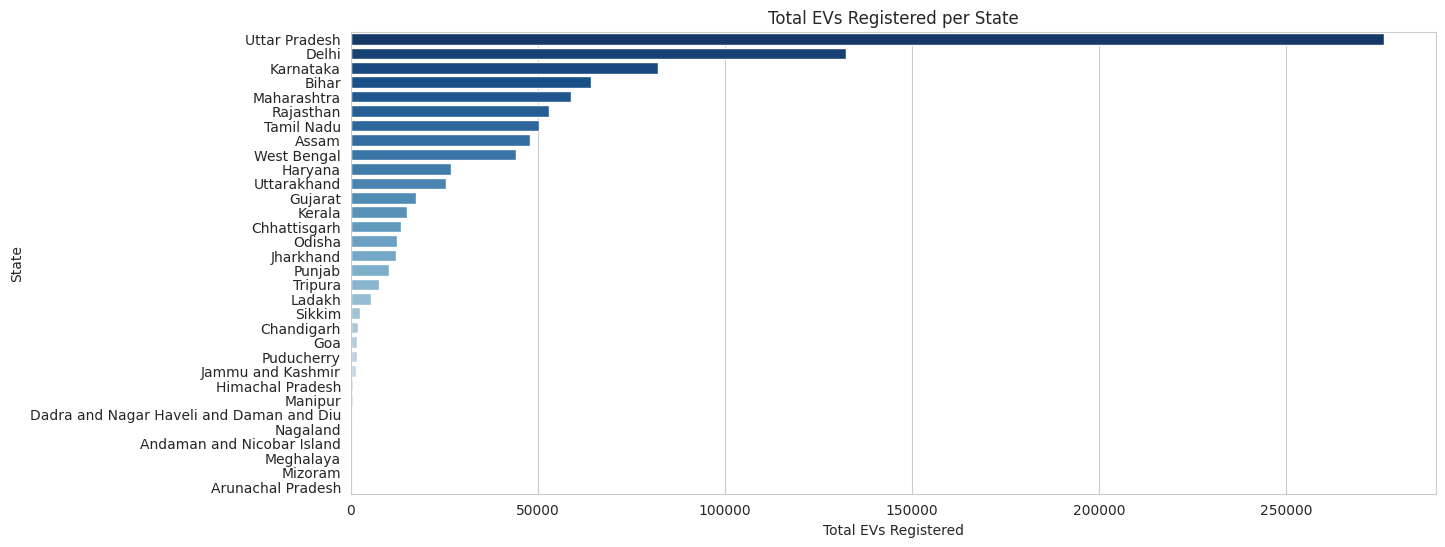

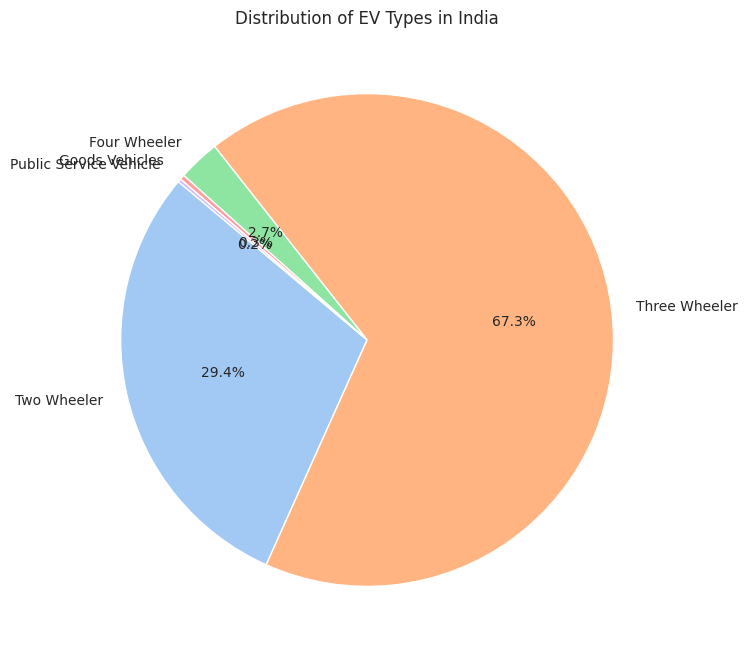

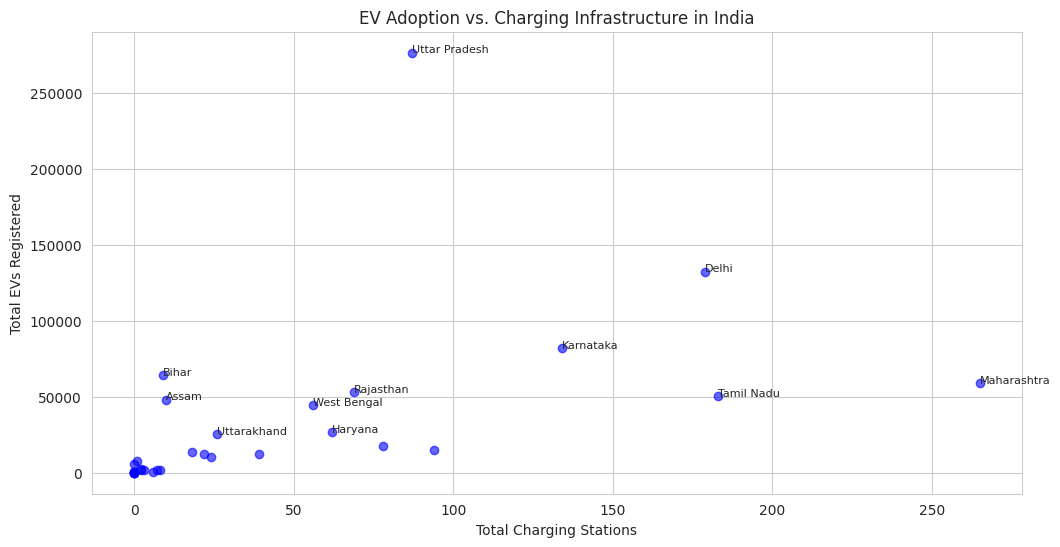

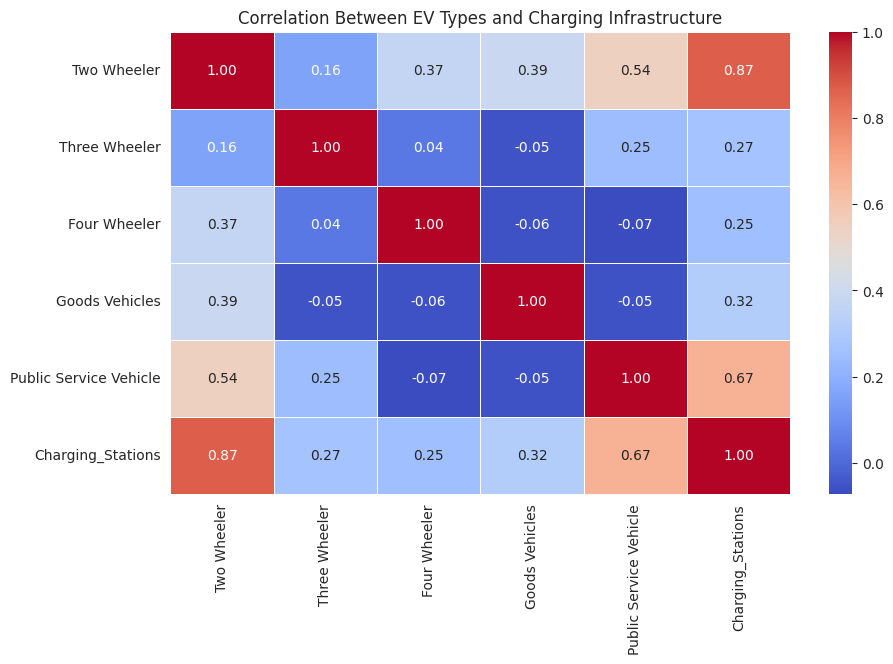

<ipython-input-1-294fe35da320>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states['Total_EV'], y=top_states['State Name'], palette="viridis")


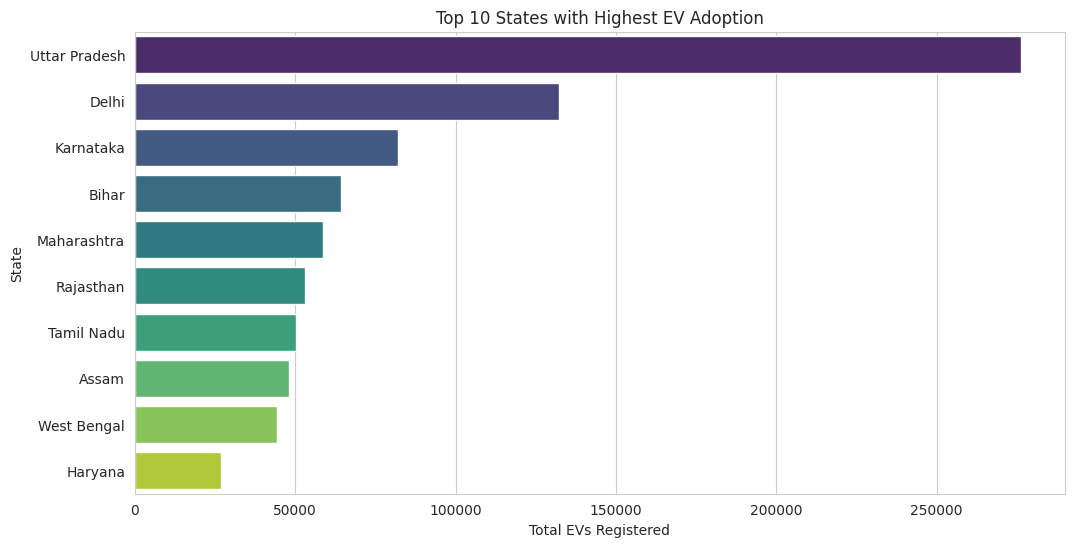

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/final_dataset.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'total-charging-stations': 'Charging_Stations', 'Grand Total': 'Total_EV'}, inplace=True)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Total_EV', 'Charging_Stations'])

# Set style
sns.set_style("whitegrid")

# ----------- 1. Bar Plot: Total EVs per state -----------
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values(by='Total_EV', ascending=False)
sns.barplot(x=df_sorted['Total_EV'], y=df_sorted['State Name'], palette="Blues_r")
plt.xlabel("Total EVs Registered")
plt.ylabel("State")
plt.title("Total EVs Registered per State")
plt.show()

# ----------- 2. Pie Chart: EV Type Distribution -----------
ev_types = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle']
ev_counts = df[ev_types].sum()

plt.figure(figsize=(8, 8))
plt.pie(ev_counts, labels=ev_types, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of EV Types in India")
plt.show()

# ----------- 3. Scatter Plot: EVs vs. Charging Stations -----------
plt.figure(figsize=(12, 6))
plt.scatter(df['Charging_Stations'], df['Total_EV'], color='blue', alpha=0.6)

# Annotate states with high EV adoption
for i, row in df.iterrows():
    if row['Total_EV'] > 20000:  # Adjust threshold if needed
        plt.annotate(row['State Name'], (row['Charging_Stations'], row['Total_EV']), fontsize=8)

plt.xlabel("Total Charging Stations")
plt.ylabel("Total EVs Registered")
plt.title("EV Adoption vs. Charging Infrastructure in India")
plt.grid(True)
plt.show()

# ----------- 4. Heatmap: Correlation between EV types and Charging Stations -----------
plt.figure(figsize=(10, 6))
sns.heatmap(df[ev_types + ['Charging_Stations']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between EV Types and Charging Infrastructure")
plt.show()

# ----------- 5. Top 10 States by EV Adoption -----------
top_states = df.nlargest(10, 'Total_EV')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states['Total_EV'], y=top_states['State Name'], palette="viridis")
plt.xlabel("Total EVs Registered")
plt.ylabel("State")
plt.title("Top 10 States with Highest EV Adoption")
plt.show()


📊 Model Performance:
Mean Absolute Error (MAE): 451.01
Mean Squared Error (MSE): 599278.77
Root Mean Squared Error (RMSE): 774.13
R² Score: 0.9999


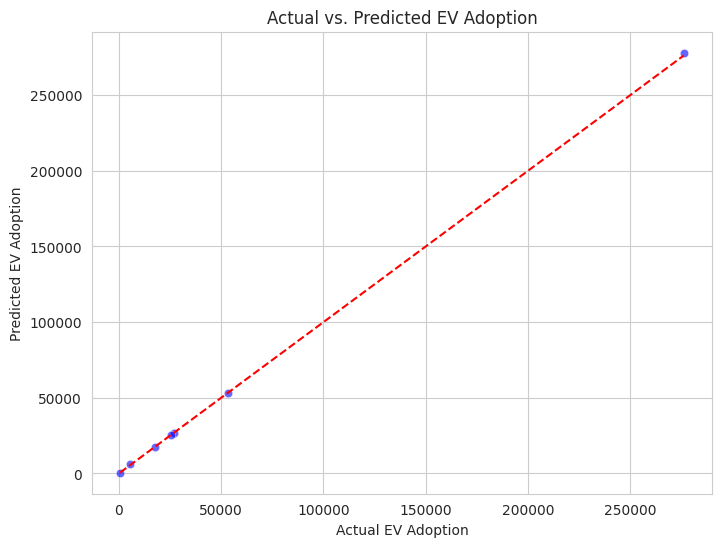

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Load the dataset
file_path = "/content/final_dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

# 2️⃣ Check for missing values and clean data
df = df.dropna()  # Removing rows with missing values

# 3️⃣ Select relevant features for EV adoption prediction
features = ['total-charging-stations', 'Two Wheeler', 'Three Wheeler',
            'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle']

target = 'Grand Total'  # Total EV adoption

# 4️⃣ Extract independent (X) and dependent (y) variables
X = df[features]
y = df[target]

# 5️⃣ Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7️⃣ Model Predictions
y_pred = model.predict(X_test)

# 8️⃣ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 9️⃣ Visualizing Actual vs. Predicted EV Adoption
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual EV Adoption")
plt.ylabel("Predicted EV Adoption")
plt.title("Actual vs. Predicted EV Adoption")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

# 1️⃣ Perform Cross-Validation (10-fold)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"📌 Cross-Validation R² Scores: {cv_scores}")
print(f"🔹 Mean R² Score: {cv_scores.mean():.4f}")

# 2️⃣ Feature Importance using Statsmodels
X_const = sm.add_constant(X)  # Add constant for intercept
ols_model = sm.OLS(y, X_const).fit()  # Fit Ordinary Least Squares model
print("\n📊 Feature Importance (p-values):\n", ols_model.pvalues)
print("\n🔍 Model Summary:\n", ols_model.summary())


📌 Cross-Validation R² Scores: [0.99999531 0.99971665 0.99974534 0.99882149 0.99862003 0.89880174
 0.99990656 0.99993727 0.99886787 0.99988395]
🔹 Mean R² Score: 0.9894

📊 Feature Importance (p-values):
 const                      2.944715e-01
total-charging-stations    1.451902e-02
Two Wheeler                7.478870e-38
Three Wheeler              3.812338e-59
Four Wheeler               1.300996e-21
Goods Vehicles             6.150203e-05
Public Service Vehicle     2.307051e-01
dtype: float64

🔍 Model Summary:
                             OLS Regression Results                            
Dep. Variable:            Grand Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.310e+05
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           4.93e-58
Time:                        11:26:37   Log-Likelihood:                -218.95
No. Observ

In [ ]:
# Define new data: A hypothetical state with given vehicle & charging station values
new_state = pd.DataFrame({
    'total-charging-stations': [50],
    'Two Wheeler': [1000],
    'Three Wheeler': [50000],
    'Four Wheeler': [200],
    'Goods Vehicles': [20],
    'Public Service Vehicle': [50]
})

# Predict EV adoption for the new state
predicted_ev_adoption = model.predict(new_state)
print(f"🔮 Predicted EV Adoption for New State: {predicted_ev_adoption[0]:.2f}")


🔮 Predicted EV Adoption for New State: 51584.51


<ipython-input-5-f332cff487c6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


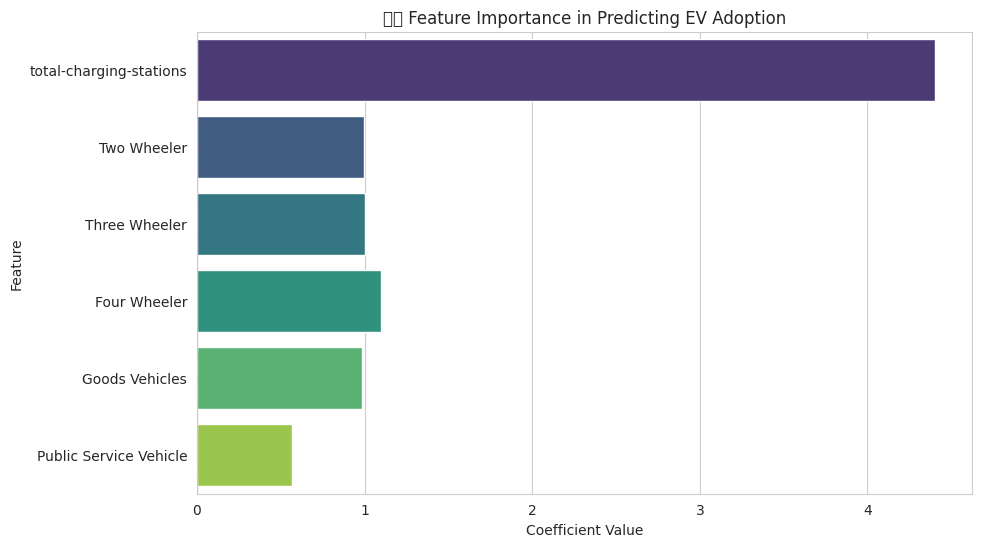

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance (OLS coefficients)
feature_importance = ols_model.params[1:]  # Exclude the intercept

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("🚗🔋 Feature Importance in Predicting EV Adoption")
plt.axvline(0, color='red', linestyle='dashed')  # Reference line
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


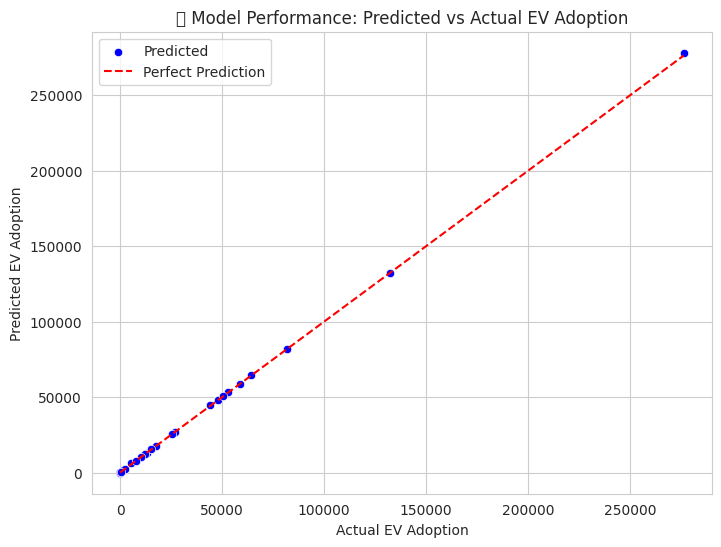

In [ ]:
import numpy as np

# Predict on training data
y_pred = model.predict(X)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color="blue", label="Predicted")
sns.lineplot(x=y, y=y, color="red", linestyle="dashed", label="Perfect Prediction")  # Reference line
plt.xlabel("Actual EV Adoption")
plt.ylabel("Predicted EV Adoption")
plt.title("🔮 Model Performance: Predicted vs Actual EV Adoption")
plt.legend()
plt.show()


In [ ]:
import geopandas as gpd

# Load India map shapefile (Assumes you have 'india_states.shp')
india_map = gpd.read_file("path/to/india_states.shp")

# Merge EV adoption predictions with state map
india_map = india_map.merge(df, left_on="State_Name", right_on="State Name")

# Plot heatmap
plt.figure(figsize=(12, 8))
india_map.plot(column="Grand Total", cmap="YlGnBu", legend=True, edgecolor="black")
plt.title("🔋 EV Adoption Across Indian States")
plt.show()


DataSourceError: path/to/india_states.shp: No such file or directory

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load an online dataset (example: Natural Earth data)
india_map = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/GeoJSONs/india_states.geojson")

# Merge with your EV dataset
df["State Name"] = df["State Name"].str.title()  # Ensure matching names
india_map = india_map.merge(df, left_on="name", right_on="State Name", how="left")

# Plot the map
plt.figure(figsize=(12, 8))
india_map.plot(column="Grand Total", cmap="YlGnBu", legend=True, edgecolor="black", missing_kwds={"color": "lightgrey"})
plt.title("🔋 EV Adoption Across Indian States")
plt.show()


HTTPError: HTTP Error 404: Not Found

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load an alternative online India GeoJSON file
india_map = gpd.read_file("https://github.com/datameet/maps/raw/master/States/Admin2/india-states.geojson")

# Check available state names
print(india_map.head())

# Merge with your EV dataset
df["State Name"] = df["State Name"].str.title()  # Ensure consistent capitalization
india_map = india_map.merge(df, left_on="st_nm", right_on="State Name", how="left")

# Plot the map
plt.figure(figsize=(12, 8))
india_map.plot(column="Grand Total", cmap="YlGnBu", legend=True, edgecolor="black", missing_kwds={"color": "lightgrey"})
plt.title("🔋 EV Adoption Across Indian States")
plt.show()


HTTPError: HTTP Error 404: Not Found